<h1>Krish Naik Machine Learning-Regression</h1>

<h3>Importing Data</h3>

In [1]:
#importing in built house pricing dataset 
#from sklearn.datasets import load_boston

# load boston is removed from the sickit learn so to directly load from the source
# import pandas as pd
# import numpy as np
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/pytz/__init__.py:30: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


In [2]:
ds= fetch_california_housing()
print(type(ds))
print()
print(ds)

<class 'sklearn.utils._bunch.Bunch'>

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dat

In [3]:

df = pd.DataFrame(ds.data)
df.columns = ds.feature_names
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
df['price(100,000$)']=ds.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,"price(100,000$)"
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


This is X:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
This is Y:
    price(100,000$)
0            4.526
1            3.585
2            3.521
3            3.413
4            3.422


<Axes: >

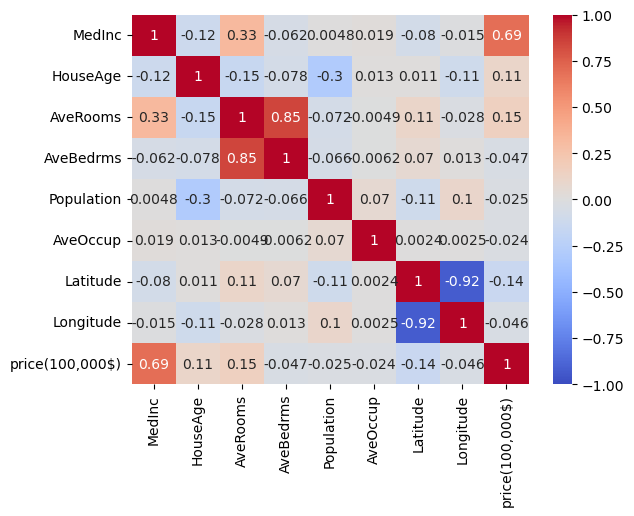

In [5]:
#dividing the dataset into dependent and independent features
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]
print("This is X:\n",X.head())
print("This is Y:\n",Y.head())
sb.heatmap(df.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)

In [6]:
#now linear regression using cross val score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

all_scores = dict()
regressor = LinearRegression()
mse = cross_val_score(regressor,X,Y,scoring='neg_mean_squared_error',cv =5)
r2_scores = cross_val_score(regressor,X,Y,scoring='r2',cv =5)
print(np.sqrt(-(mse)))
print("mean error=",np.mean(np.sqrt(-(mse))))
print("r2_scores:",r2_scores)
print("Mean R² Score:", r2_scores.mean())
all_scores['cross_val_score']=r2_scores.mean()

[0.69631786 0.78898504 0.80387217 0.73702076 0.70333835]
mean error= 0.7459068363518109
r2_scores: [0.54866323 0.46820691 0.55078434 0.53698703 0.66051406]
Mean R² Score: 0.5530311140279569


In [7]:
#linear regression using test train split
from turtle import color
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.metrics import r2_score

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=7)
regressor_tt = LinearRegression()
regressor_tt.fit(x_train,y_train)
y_test_pred=regressor_tt.predict(x_test)
print(y_test_pred)
print()
print("R2 score is:",r2_score(y_test,y_test_pred))
all_scores['tt_regression']=r2_score(y_test,y_test_pred)

[[1.65084222]
 [2.47797721]
 [2.42550694]
 ...
 [1.86032202]
 [2.39125575]
 [3.84598092]]

R2 score is: 0.6075494500520069


In [ ]:
#Ridge regression with normal hyperparameters and no hyperparameter tuning
from sklearn.linear_model import Ridge

ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(x_train,y_train)
y_test_pred_r = ridge_regressor.predict(x_test)
ridge_regressor_r2_score=r2_score(y_test,y_test_pred_r)
print("R2 score is:",ridge_regressor_r2_score)
all_scores['ridge_regressor']=ridge_regressor_r2_score

R2 score is: 0.607533250898342


In [9]:
#ridge regression with hyperparameter tuning
from sklearn.model_selection import GridSearchCV

ridge_regressor_ht = Ridge()
params={'alpha':[10e-15,10e-10,10e-8,10e-5,10e-3,0.1,1,2,3,5,10,15,20,30,40,50]}
ridge_regressor_htg = GridSearchCV(ridge_regressor_ht,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor_htg.fit(x_train,y_train)
print("Best param(alpha):",ridge_regressor_htg.best_params_)
print("Best score:",ridge_regressor_htg.best_score_)

y_test_pred_rht = ridge_regressor_htg.predict(x_test)
ridge_regressor_ht_r2=r2_score(y_test,y_test_pred_rht)
print("\ntest score:",ridge_regressor_ht_r2)
all_scores['ridge_regressor_ht']=ridge_regressor_ht_r2

Best param(alpha): {'alpha': 40}
Best score: -0.5260303419828272

test score: 0.606904209252189


In [10]:
#Lasso regression without hyper parameter tuning
from sklearn.linear_model import Lasso

lasso_regressor = Lasso(alpha=0.01)
lasso_regressor.fit(x_train,y_train)
y_test_pred_l = lasso_regressor.predict(x_test)
lasso_regressor_r2=r2_score(y_test,y_test_pred_l)
print("LAsso test score:",lasso_regressor_r2)
all_scores['lasso_regressor'] = lasso_regressor_r2

LAsso test score: 0.5996059364885357


In [11]:
#lasso regression with hyperparameter tuning
lasso_regressor_ht=Lasso()

lasso_regressor_htg= GridSearchCV(lasso_regressor_ht,params,scoring='neg_mean_squared_error',cv=5)
lasso_regressor_htg.fit(x_train,y_train)
print("Best parameter:",lasso_regressor_htg.best_params_)
print("Best Score:",lasso_regressor_htg.best_score_)

y_test_pred_lht = lasso_regressor_htg.predict(x_test)
lasso_regressor_ht_r2=r2_score(y_test,y_test_pred_lht)
print("\nR2 test score:",lasso_regressor_ht_r2)
all_scores['lasso_regressor'] = lasso_regressor_ht_r2
print("\nAll Scores:",all_scores)

Best parameter: {'alpha': 0.0001}
Best Score: -0.5261664049070356

R2 test score: 0.607498791006776

All Scores: {'cross_val_score': 0.5530311140279569, 'tt_regression': 0.6075494500520069, 'ridge_regressor': 0.607533250898342, 'ridge_regressor_ht': 0.606904209252189, 'lasso_regressor': 0.607498791006776}
